In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
from common.plot_style_utils import set_pub_plot_context, save_for_pub

In [2]:
vocab = pd.read_csv("../../data/bpe/attrib_1000.vocab", sep ="\t", names=["sequence","order"])
vocab

,sequence,order
0,<unk>,0
1,GC,0
2,GA,-1
3,TC,-2
4,TA,-3
5,TG,-4
6,CA,-5
7,TT,-6
8,GAA,-7
9,GCA,-8


In [3]:
# cut outunk and the single chars which are appended
vocab = vocab.iloc[1:-5,:]

# negate the order
vocab['order'] = -vocab['order']
vocab

/home/sandias42/miniconda3/envs/attrib/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sequence,order
1,GC,0
2,GA,1
3,TC,2
4,TA,3
5,TG,4
6,CA,5
7,TT,6
8,GAA,7
9,GCA,8
10,TCA,9


In [4]:
vocab['len'] = vocab.sequence.map(len)

/home/sandias42/miniconda3/envs/attrib/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
vocab

,sequence,order,len
1,GC,0,2
2,GA,1,2
3,TC,2,2
4,TA,3,2
5,TG,4,2
6,CA,5,2
7,TT,6,2
8,GAA,7,3
9,GCA,8,3
10,TCA,9,3


In [6]:
# plot the rank order vs length
set_pub_plot_context(context="paper")

mkdir: cannot create directory ‘../../data/manuscript/figs/1/c_scatter’: File exists


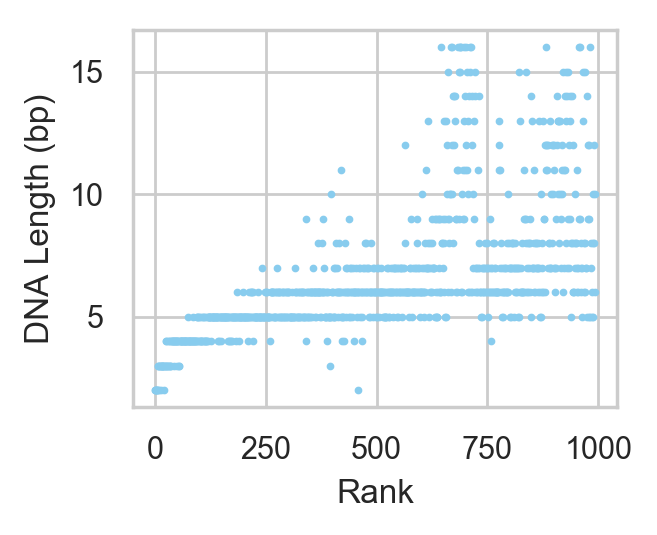

In [7]:
fig = plt.figure(figsize=(2.5,2), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="Rank",
                    ylabel="DNA Length (bp)")
palette = sns.color_palette()
ax.scatter(vocab['order'], vocab['len'], c=palette[0], s=2, alpha=1)
!mkdir ../../data/manuscript/figs/1/c_scatter
save_for_pub(fig, path="../../data/manuscript/figs/1/c_scatter/v0", dpi=500)

In [8]:
# Examples.

# The first 12 bp sequence:
ex1 = vocab[vocab['len'] == 12].sequence.values[0]
print(ex1)

# The first 13 bp sequence:
ex2 = vocab[vocab['len'] == 13].sequence.values[0]
print(ex2)

# The first 16 bp sequence:
ex3 = vocab[vocab['len'] == 16].sequence.values[0]
print(ex3)

TAACTCCGCCCA
TAAATGGCCCGCC
GTTCCACTGAGCGTCA


Blasting the above.
1.  Repeated twice in the SV40 promoter https://www.snapgene.com/resources/plasmid-files/?set=basic_cloning_vectors&plasmid=SV40_promoter SV40 Early promoter here: http://parts.igem.org/Part:BBa_K747102 4283:4294.
2. Found in the CMV promoter e.g. http://parts.igem.org/Part:BBa_S05340 69:81 or https://www.snapgene.com/resources/plasmid-files/?set=basic_cloning_vectors&plasmid=CMV_promoter 211:223
3. Matches plasmid backbone ORI pMB1 end of the sequence http://parts.igem.org/Part:pSB1C3 892:907